## The Numerov Algorithm

The dimensional SE for harmonic potential is:

$$\frac{d^2\psi}{dx^2} + \frac{2m}{\hbar^2}\bigg(E - \frac{1}{2}m\omega^2x^2\bigg)\psi = 0$$

The non-dimensionlized SE for harmonic potential is:

$$\frac{d^2y}{d\tilde{x}^2} = -K^2(\tilde{x})y$$

where,
$E_0 = \hbar \omega$ and $E = E_0\tilde{E}$ and $V(x) = E_0 \tilde{V}(x)$

$x = l_0\tilde{x}$

$K^2(x) = \tilde{E} - \tilde{V}(\tilde{x})$

$y = \psi /(1/\sqrt{l_0})$

The algorithm can calculate $y_{n+1}$ from the previous two points, if eigenvalue E is known:

$$ \bigg(1+\frac{\Delta x^2}{12}K_{n+1}^2\bigg)y_{n+1} = 2\bigg(1-\frac{5}{12}\Delta x^2 K_n^2 \bigg)y_n - \bigg( 1+ \frac{\Delta x^2}{12}K_{n-1}^2\bigg)y_{n-1}$$

### How to prevent divergence in right half

Stop the left wavefunction at the classical turning point $x$ such that $V(x)- E_n=0$. Then start a new wavefunction from right end limits. Evolve it backwards till the stopping point of first function. Match both the functions while plotting by multiplying by suitable constants

In [238]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [239]:
def eigenvalue(n):
    return n+0.5

def Kn(n):
    return Es-0.25*xs[n]**2
    
def numerov(dx,i):
    y = np.zeros(10)
    K3 = np.zeros(10)
    K2= np.zeros(10)
    K1= np.zeros(10)
    
    if dx>0:
        K1[:],K2[:],K3[:] = Kn(i-2)[:],Kn(i-1)[:],Kn(i)[:] 
    
        y[:] = 2*(1-(5/12)*dx**2 * K2[:])*ys_left[:,i-1] - (1+(1/12)*dx**2*K1[:])*ys_left[:,i-2]
        y[:] = y/(1+(1/12)*(dx**2)*K3[:])
    else:
        K1[:],K2[:],K3[:] = Kn(i+2)[:],Kn(i+1)[:],Kn(i)[:] 
    
        y[:] = 2*(1-(5/12)*dx**2 * K2[:])*ys_right[:,i+1-tp] - (1+(1/12)*dx**2*K1[:])*ys_right[:,i+2-tp]
        y[:] = y/(1+(1/12)*(dx**2)*K3[:])
    return y[:]

# to find the turning points for harmonic potential 
def TP(E):
    return (4*E)**0.5
    
    

In [240]:
ns = np.arange(0,10,1,dtype = int)
print(ns)
Es = eigenvalue(ns) 

dx = 0.1
xlim = 10.0
xs = np.arange(-xlim,xlim,dx)
N = len(xs)
for i in range(N):
    if xs[i]>=0:
        if abs(xs[i]-TP(Es[2]))<dx:
            tp = i
            break

print(tp)
print(N)
ys_left = np.zeros((10,tp+1))
ys_right = np.zeros((10,N-tp))


ys_left[:,0] = 0.0
ys_left[:,1] = 1e-9

ys_right[:,-1] = 0.0
ys_right[:,-2] = 1e-9

[0 1 2 3 4 5 6 7 8 9]
131
200


In [241]:
for i in range(2,len(ys_left[0])): # evaluate all wavefunctions point by point along x axis
    ys_left[:,i] = numerov(dx,i)

for i in range(N-3,tp-1,-1):
    ys_right[:,i-tp] = numerov(-dx,i)
    

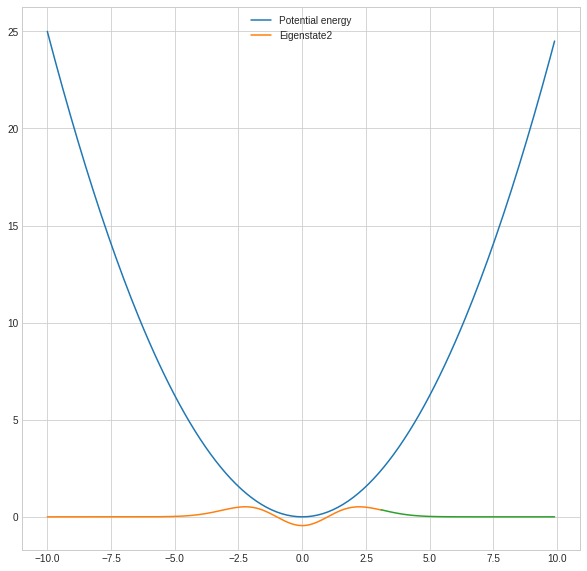

In [245]:
fig = plt.figure(figsize = (10,10))

plt.plot(xs, 0.25*xs**2, label = 'Potential energy')

for i in range(2,3):
    plt.plot(xs[0:tp+1],0.61*ys_left[i,:],label = 'Eigenstate%d'%i)
    
for i in range(2,3):
    plt.plot(xs[tp:N],ys_right[i,:])
    
#plt.xlim(-10,7)
plt.legend()

In [243]:
print(len(ys_right[0]))

69


In [244]:
print(len(xs[tp:N]))

69
